# **Brazil Amazon Fire Data Analysis:**

**Sourse:** __https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil__

In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as slr
#import statmodels as sm

In [65]:
data= pd.read_csv("C:/Users/MyMachine/Desktop/Mission-Project/00_DataSets/13_Amazon_Fire_Dataset.csv",encoding_errors=None, encoding='latin-1', parse_dates= ["date"] )

In [66]:
data.shape

(6454, 5)

In [67]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [68]:
# Display top 5  rows:
data.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [69]:
# Display last 5 rows of the dataframe:
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


-----

In [70]:
# Find shape of our dataframe (number of 
# rows and number of columns):
print(data.shape)
print(F"Total Number of Rows: {data.shape[0]}")
print(f"Total Number of Columns: {data.shape[1]}")

(6454, 5)
Total Number of Rows: 6454
Total Number of Columns: 5


-----

In [71]:
# Get general info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


-----

In [72]:
# Check for duplicate data and drop them:
data.duplicated().sum()

np.int64(32)

In [73]:
data.duplicated().any()

np.True_

In [74]:
data= data.drop_duplicates()

In [75]:
data.duplicated().any()

np.False_

-----

In [76]:
# Check Null Values in the dataset:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

So, none of the columns contain any null values.

----

In [77]:
# Get overall statistics of the dataset:
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [78]:
data.describe(include= "all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


-----

In [79]:
# Rename Month Names to English:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [80]:
data["month"].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [81]:
data["Months"]= data["month"].map({'Janeiro': "January", 'Fevereiro': "February", 'Março': "March", 'Abril': "April", 'Maio': "May", 'Junho': "June", 'Julho': "July",
       'Agosto': "August", 'Setembro': "September", 'Outubro': "October", 'Novembro': "November", 'Dezembro': "December"})

In [82]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [83]:
data.head()

,year,state,month,number,date,Months
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [84]:
data

,year,state,month,number,date,Months
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,December
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,December
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,December
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,December


In [39]:
#data.drop("Months", axis= 1, inplace= True)

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_1204\3191683375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("Months", axis= 1, inplace= True)


In [85]:
data.head()

,year,state,month,number,date,Months
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


----

In [86]:
#  Total number of fires registered:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [87]:
data["number"].sum().round()

np.float64(698811.0)

----

In [88]:
# Total number of fire registrations:
data.shape[0]

6422

So, `6422` is the official number of `total Fire Registrations`. `Total Number of Fires Registered` and `Total Number of Fire Registration` are treated differently here.  A single Fire Registration can contain many number of Fire Incidents.

----

In [98]:
# In which month maximum number of forest fires were reported:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [91]:
data.groupby(by= "Months")["number"].sum().round().sort_values(ascending=False)

Months
July         92319.0
October      88682.0
August       88050.0
November     85508.0
September    58578.0
December     57535.0
June         55998.0
January      47682.0
May          34725.0
February     30839.0
March        30709.0
April        28185.0
Name: number, dtype: float64

In [92]:
data.groupby(by= "Months")["number"].mean().round().sort_values(ascending=False)

Months
July         171.0
October      164.0
August       163.0
November     158.0
December     112.0
September    108.0
June         104.0
January       89.0
May           65.0
February      58.0
March         58.0
April         53.0
Name: number, dtype: float64

In [93]:
data.head()

,year,state,month,number,date,Months
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


C:\Users\MyMachine\AppData\Local\Temp\ipykernel_1204\2038292189.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data, x= "Months", y= 'number', palette="Blues")


<Axes: xlabel='Months', ylabel='number'>

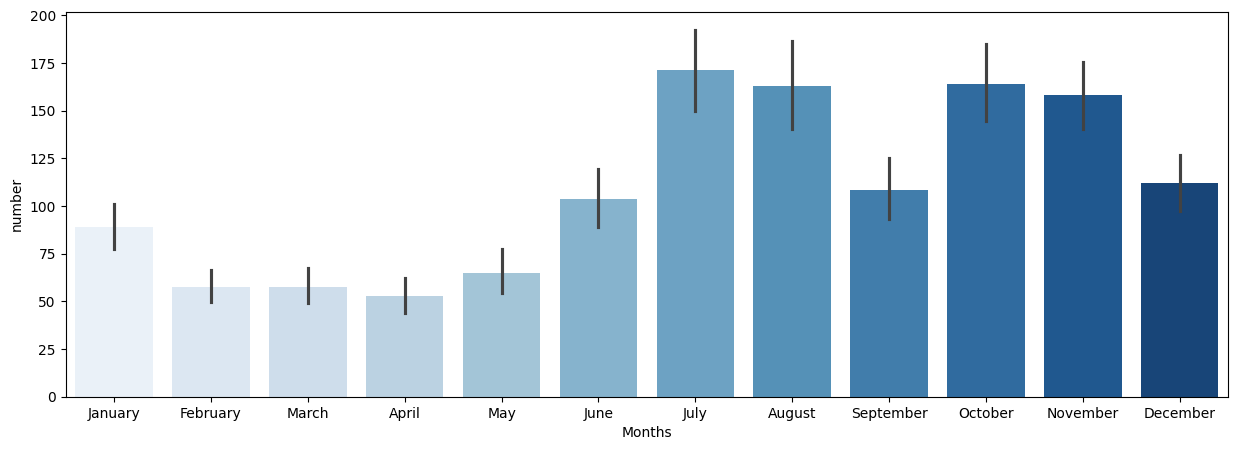

In [97]:
plt.figure(figsize= (15,5))
sns.barplot(data= data, x= "Months", y= 'number', palette="Blues")

-----

In [99]:
# In which year the maximum number of 
# forest fires were reported:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [127]:
data1= data.groupby(by= "year")["number"].sum().round().sort_values(ascending= False).reset_index()

In [128]:
data1

,year,number
0,2003,42761.0
1,2016,42212.0
2,2015,41208.0
3,2012,40085.0
4,2014,39621.0
5,2009,39116.0
6,2004,38450.0
7,2002,37391.0
8,2010,37037.0
9,2017,36620.0


<Axes: xlabel='year', ylabel='number'>

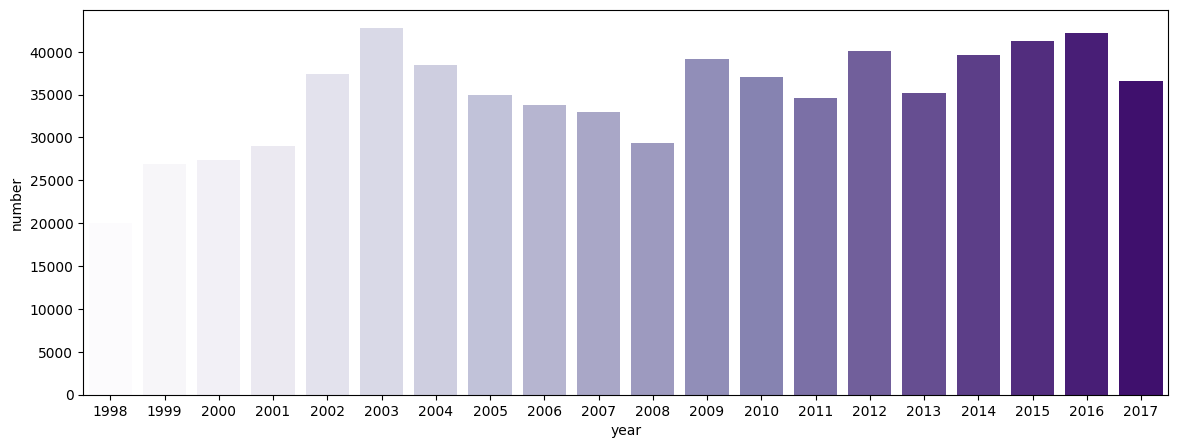

In [132]:
plt.figure(figsize= (14,5))
sns.barplot(data= data1, x= 'year', y= 'number', hue= 'year', palette="Purples", legend= False)


----

In [120]:
# In which state maximum number of Forest Fires were reported:
data2= data.groupby(by= 'state')['number'].sum().reset_index()

In [125]:
data2.sort_values(by= 'number', ascending= False)

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52426.918
20,Sao Paulo,51121.198
16,Rio,45094.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


<Axes: xlabel='number', ylabel='state'>

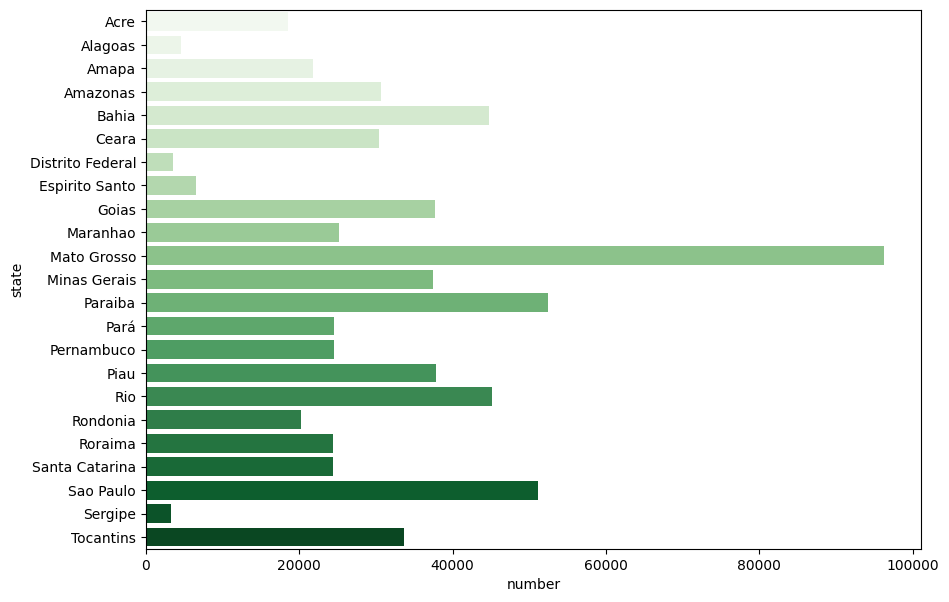

In [122]:
plt.figure(figsize=(10,7))
sns.barplot(data= data2, y= "state", x= "number", hue= "state", legend= False, palette= "Greens")

-----

In [133]:
# Find total number of fires were 
# reported:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [135]:
data["number"].sum().round()

np.float64(698811.0)

-----

In [136]:
# Find total number of Fires were reported in Amazonas:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [137]:
data["state"]

0            Acre
1            Acre
2            Acre
3            Acre
4            Acre
          ...    
6449    Tocantins
6450    Tocantins
6451    Tocantins
6452    Tocantins
6453    Tocantins
Name: state, Length: 6422, dtype: object

In [139]:
data[data["state"] == "Amazonas"]

,year,state,month,number,date,Months
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January
721,2001,Amazonas,Janeiro,3.0,2001-01-01,January
722,2002,Amazonas,Janeiro,17.0,2002-01-01,January
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,December
953,2013,Amazonas,Dezembro,236.0,2013-01-01,December
954,2014,Amazonas,Dezembro,293.0,2014-01-01,December
955,2015,Amazonas,Dezembro,565.0,2015-01-01,December


In [140]:
len(data[data["state"] == "Amazonas"])

239

So, total reports were: `239`

In [145]:
# And, for total number of Fire Incidences:
data[data["state"] == "Amazonas"]["number"].sum().round().astype("int")

np.int64(30650)

----

In [146]:
# Display Number of Fires were reported 
# in Amazonas (Year wise):
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [149]:
data4= data[data["state"]== 'Amazonas']

In [151]:
data4.shape

(239, 6)

In [155]:
data5= data4.groupby(by= 'year')["number"].sum().reset_index()

In [156]:
data5.head(2)

,year,number
0,1998,946.0
1,1999,1061.0


<Axes: xlabel='year', ylabel='number'>

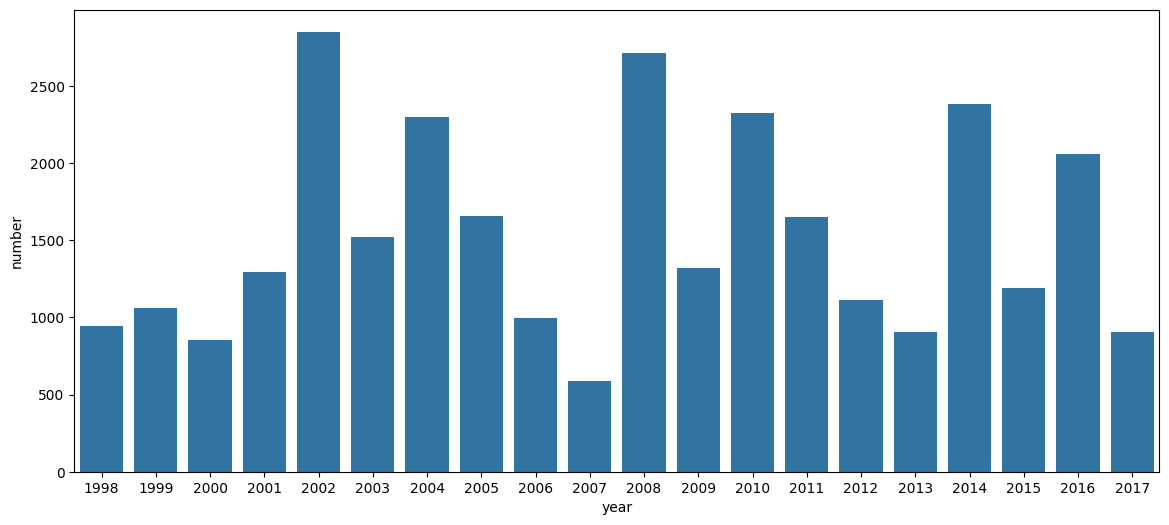

In [159]:
plt.figure(figsize=(14,6))
sns.barplot(y= 'number', x= 'year', data= data5 )

----------
----

In [160]:
# Display number of fires were reported in amazonas (Day-wise):
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [163]:
data10= data[data["state"]== "Amazonas"]

In [164]:
data10.head(3)

,year,state,month,number,date,Months
718,1998,Amazonas,Janeiro,0.0,1998-01-01,January
719,1999,Amazonas,Janeiro,3.0,1999-01-01,January
720,2000,Amazonas,Janeiro,7.0,2000-01-01,January


In [177]:
day= data10.groupby(by= data10["date"].dt.dayofweek)["number"].sum()

import calendar
day.index= [calendar.day_name[x] for x in range(0,7)]
day= day.reset_index()

In [178]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<Axes: xlabel='index', ylabel='number'>

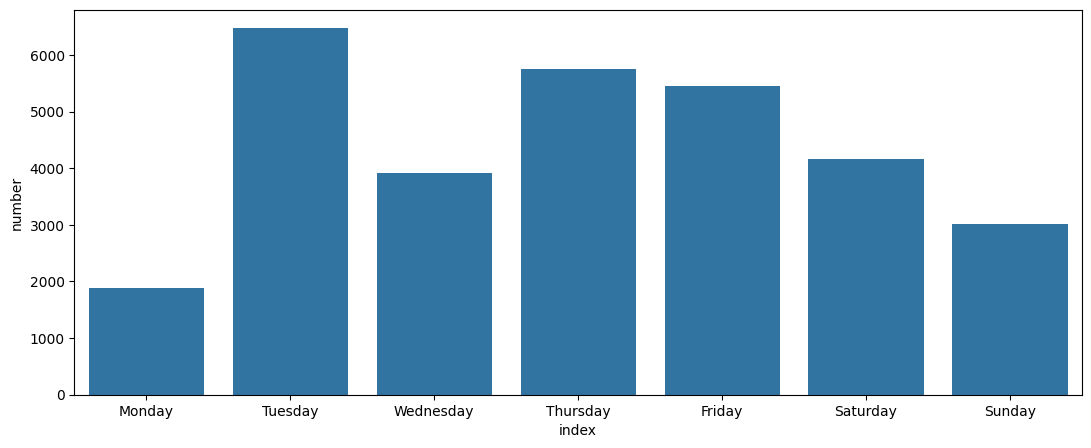

In [180]:
plt.figure(figsize=(13,5))
sns.barplot(data= day, x= "index", y= 'number')

----
----

In [181]:
# Find total number of fires were reported 
# in 2015 and 
#visualize the data based on each month:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [189]:
fire_2015= data[data[ "year"]== 2015]

In [187]:
data[data[ "year"]== 2015]["number"].sum().round().astype("int")

np.int64(41208)

In [194]:
fire_2015.groupby(by= "Months")["number"].sum()

Months
April        2573.000
August       4363.125
December     4088.522
February     2309.000
January      4635.000
July         4364.392
June         3260.552
March        2202.000
May          2384.000
November     4034.518
October      4499.525
September    2494.658
Name: number, dtype: float64

In [193]:
fire_2015.groupby(by= "Months")["number"].sum().reset_index()

,Months,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<Axes: xlabel='Months', ylabel='number'>

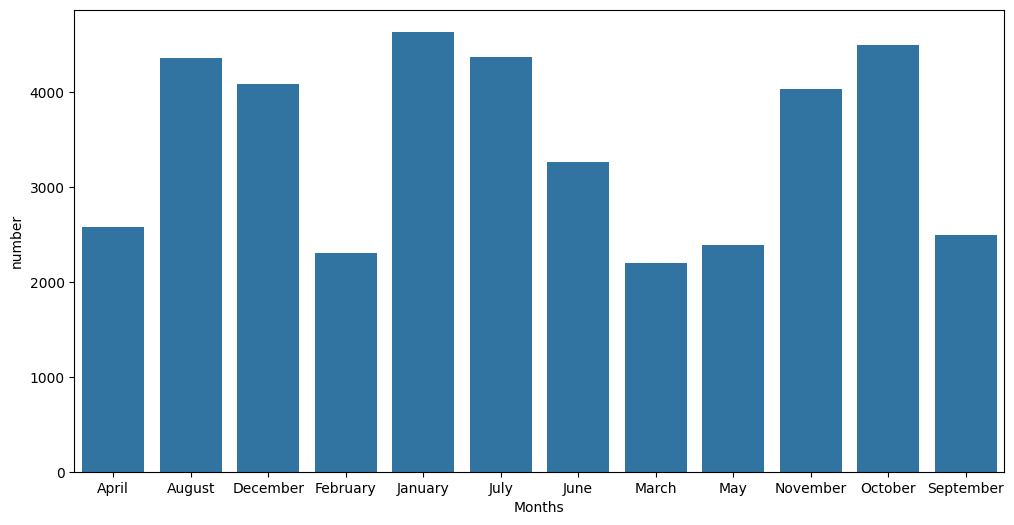

In [196]:
plt.figure(figsize=(12,6))
sns.barplot(data= fire_2015.groupby(by= "Months")["number"].sum().reset_index(), x= "Months", y= "number")

---
---

In [197]:
# Find average number of fires were reported from higest to lowest (State wise):
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [201]:
data.groupby(by= 'state')["number"].mean().sort_values(ascending=False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

In [202]:
bbb= data.groupby(by= 'state')["number"].mean().sort_values(ascending=False).reset_index()

In [203]:
bbb

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<Axes: xlabel='number', ylabel='state'>

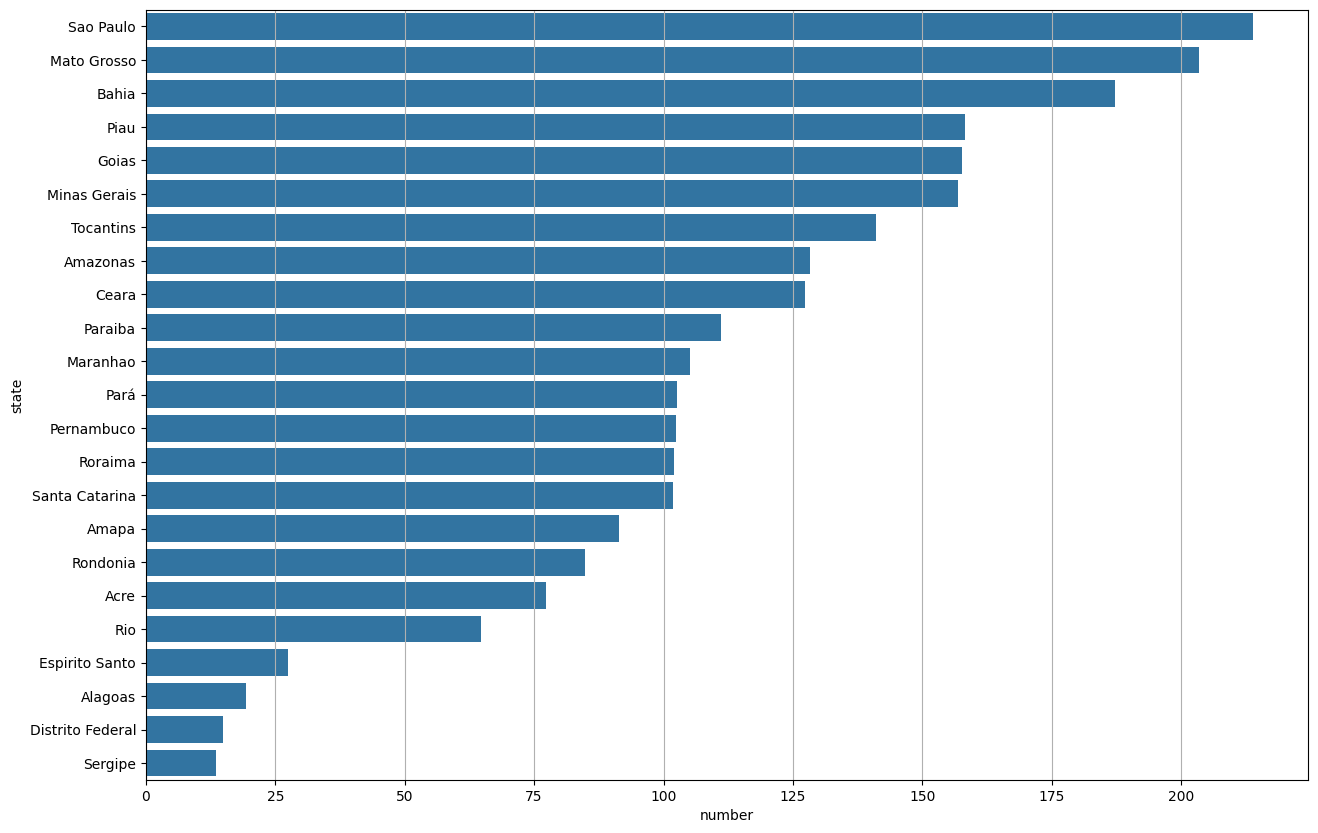

In [211]:
plt.figure(figsize= (15,10), frameon= True)
# Plot gridlines in the figure:
plt.grid(True)
sns.barplot(data= bbb, y= "state", x= "number")

---
----

In [212]:
# To find the state names where fires
# were reported in "December" Month
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'Months'], dtype='object')

In [217]:
# Data points where the fire is reported:
fires_reported= data[data['number']> 0.0]

In [223]:
fires_reported[fires_reported["Months"]== "December"]["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)